# Presetup

In [1]:
import os 
os.chdir('/content/drive/My Drive/YOLO_v3')

In [ ]:
#### DOWNLOADING THE CONFIG FILE
# !mkdir '/content/drive/My Drive/YOLO_v3/cfg'
# !wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

In [2]:
with open('cfg/yolov3.cfg','r') as f:
  text = f.read()
print(text)

[net]
# Testing
# batch=1
# subdivisions=1
# Training
batch=64
subdivisions=16
width=416
height=416
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1

learning_rate=0.001
burn_in=1000
max_batches = 500200
policy=steps
steps=400000,450000
scales=.1,.1

[convolutional]
batch_normalize=1
filters=32
size=3
stride=1
pad=1
activation=leaky

# Downsample

[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

# Downsample

[convolutional]
batch_normalize=1
filters=128
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=128
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear

[convolutiona

In [ ]:
#### DOWNLOADING THE TEST IMAGE
# !wget https://github.com/ayooshkathuria/pytorch-yolo-v3/raw/master/dog-cycle-car.png

In [ ]:
#### DOWNLOADING THE PRETRAINED WEIGHTS
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-06-18 15:20:40--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   266KB/s    in 15m 9s  

2020-06-18 15:35:51 (266 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
#### DOWNLOADING THE FILE COCO.NAMES
!mkdir data
!wget https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/data/coco.names

--2020-06-19 14:20:34--  https://raw.githubusercontent.com/ayooshkathuria/YOLO_v3_tutorial_from_scratch/master/data/coco.names
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 625 [text/plain]
Saving to: ‘coco.names’

coco.names          100%[===================>]     625  --.-KB/s    in 0s      

2020-06-19 14:20:34 (13.9 MB/s) - ‘coco.names’ saved [625/625]



**Shell Command to Perform the Detection on an image or images**

In [4]:
!python detector.py --images 'images/NY-city.jpg' --det 'det'

Loading network.....
Network successfully loaded
/pytorch/torch/csrc/utils/python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)
NY-city.jpg          predicted in  1.431 seconds
Objects Detected:    person person person person bicycle car car car car traffic light traffic light traffic light
----------------------------------------------------------
SUMMARY
----------------------------------------------------------
Task                     : Time Taken (in seconds)

Reading addresses        : 0.001
Loading batch            : 0.923
Detection (1 images)     : 1.433
Output Processing        : 0.000
Drawing Boxes            : 0.044
Average time_per_img     : 2.745
----------------------------------------------------------


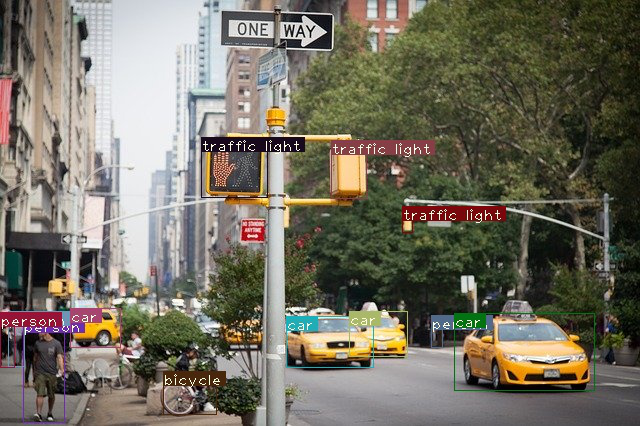

In [5]:
from PIL import Image
Image.open('det/det_NY-city.jpg')

In [ ]:
!python darknet.py

#Configuration File

The cfg file describes the layout of the network, block by block.

If you open the configuration file, you will see something like this.



```
[convolutional]
batch_normalize=1
filters=64
size=3
stride=2
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=32
size=1
stride=1
pad=1
activation=leaky

[convolutional]
batch_normalize=1
filters=64
size=3
stride=1
pad=1
activation=leaky

[shortcut]
from=-3
activation=linear
```

We see 4 blocks above. Out of them, 3 describe convolutional layers, followed by a shortcut layer. A shortcut layer is a skip connection, like the one used in ResNet. 


**1. Convolutional**

```
[convolutional]
batch_normalize=1  
filters=64  
size=3  
stride=1  
pad=1  
activation=leaky
```



**2. Shortcut**

```
[shortcut]
from=-3  
activation=linear
```

A shortcut layer is a skip connection, akin to the one used in ResNet. The *from* parameter is -3, which means the output of the shortcut layer is obtained by **adding** feature maps from the previous and the 3rd layer backwards from the shortcut layer.

**3. Upsample**

```
[upsample]
stride=2
```
Upsamples the feature map in the previous layer by a factor of *stride* using bilinear upsampling.

**4. Route**


```
[route]
layers = -4

[route]
layers = -1, 61
```
The route layer deserves a bit of explanation. It has an attribute *layers* which can have either one, or two values.

When *layers* attribute has only one value, it outputs the feature maps of the layer indexed by the value. In our example, it is -4, so the layer will output feature map from the 4th layer backwards from the *Route* layer.

When *layers* has two values, it returns the concatenated feature maps of the layers indexed by it's values. In our example it is -1, 61, and the layer will output feature maps from the previous layer (-1) and the 61st layer, concatenated along the depth dimension.

**5. YOLO**


```
[yolo]
mask = 0,1,2
anchors = 10,13,  16,30,  33,23,  30,61,  62,45,  59,119,  116,90,  156,198,  373,326
classes=80
num=9
jitter=.3
ignore_thresh = .5
truth_thresh = 1
random=1
```
YOLO layer corresponds to the Detection layer. The anchors describes 9 anchors, but only the anchors which are indexed by attributes of the mask tag are used. Here, the value of mask is 0,1,2, which means the first, second and third anchors are used. This make sense since each cell of the detection layer predicts 3 boxes. In total, we have detection layers at 3 scales, making up for a total of 9 anchors.

**Net**

```
[net]
# Testing
batch=1
subdivisions=1
# Training
# batch=64
# subdivisions=16
width= 320
height = 320
channels=3
momentum=0.9
decay=0.0005
angle=0
saturation = 1.5
exposure = 1.5
hue=.1
```
There's another type of block called net in the cfg, it describes information about the network input and training parameters. It isn't used in the forward pass of YOLO. However, it does provide us with information like the network input size, which we use to adjust anchors in the forward pass.

# Code Test

In [ ]:
import torch
import numpy as np

In [ ]:
a = torch.rand((1,5,3))
a

tensor([[[0.9836, 0.5328, 0.5230],
         [0.3219, 0.8056, 0.4591],
         [0.3533, 0.6664, 0.4572],
         [0.9688, 0.7267, 0.5434],
         [0.8625, 0.2068, 0.0017]]])

In [ ]:
(a[0],torch.max(a[0][:,1:],dim=1).values.unsqueeze(1))

(tensor([[0.9836, 0.5328, 0.5230],
         [0.3219, 0.8056, 0.4591],
         [0.3533, 0.6664, 0.4572],
         [0.9688, 0.7267, 0.5434],
         [0.8625, 0.2068, 0.0017]]), tensor([[0.5328],
         [0.8056],
         [0.6664],
         [0.7267],
         [0.2068]]))

In [ ]:
torch.cat((a[0],torch.max(a[0][:,1:],dim=1).values.unsqueeze(1)),1)

tensor([[0.9836, 0.5328, 0.5230, 0.5328],
        [0.3219, 0.8056, 0.4591, 0.8056],
        [0.3533, 0.6664, 0.4572, 0.6664],
        [0.9688, 0.7267, 0.5434, 0.7267],
        [0.8625, 0.2068, 0.0017, 0.2068]])

In [ ]:
torch.nonzero(a[0][:,0])

tensor([[0],
        [1],
        [2],
        [3],
        [4]])

In [ ]:
b = torch.tensor([[0.6, 0.0, 0.0, 0.0],
                    [0.0, 0.4, 0.0, 0.0],
                    [0.0, 0.0, 1.2, 0.0],
                    [0.0, 0.0, 0.10,-0.4]])
non_zero_ind = torch.nonzero(b[:,0]).squeeze()
non_zero_ind

tensor(0)

In [ ]:
b[non_zero_ind,:]

tensor([0.6000, 0.0000, 0.0000, 0.0000])

In [ ]:
b.shape

torch.Size([4, 4])

In [ ]:
# Testing the unique function
def unique(tensor):
    # convert tensor to numpy
    tensor_np = tensor.cpu().numpy()
    # find unique
    unique_np = np.unique(tensor_np)
    # create a tenor of unique_np
    unique_tensor = torch.from_numpy(unique_np)
    # the above is simply two instances pointing to a single tensor
    # we create an independent tensor of same type as input tensor and shape of unique tensor
    tensor_res = tensor.new(unique_tensor.shape)
    # we copy values of the unique tensor to this independent tensor (tensor_res)
    tensor_res.copy_(unique_tensor)

    return tensor_res

In [ ]:
import torch
import numpy as np

a = torch.randint(5, 10, (10, 1))
a

tensor([[6],
        [9],
        [5],
        [6],
        [5],
        [9],
        [8],
        [5],
        [5],
        [9]])

In [ ]:
unique(a)

tensor([5, 6, 8, 9])

In [ ]:
# np.full()
np.full((2, 2), 10)

array([[10, 10],
       [10, 10]])

**torch.index_select()**

torch.index_select(input, dim, index, out=None) → Tensor

In [ ]:
x = torch.randn(3, 4)
x

tensor([[-0.5194,  0.2481,  1.2516, -0.8230],
        [ 1.0191, -0.3240,  0.5051, -0.0481],
        [-1.2960, -0.2349, -1.0428, -0.0568]])

In [ ]:
indices = torch.tensor([0, 2])

In [ ]:
torch.index_select(x, 0, indices)

tensor([[-0.5194,  0.2481,  1.2516, -0.8230],
        [-1.2960, -0.2349, -1.0428, -0.0568]])

In [ ]:
torch.index_select(x, 1, indices)

tensor([[-0.5194,  1.2516],
        [ 1.0191,  0.5051],
        [-1.2960, -1.0428]])